### Switching probability in first 100 trials
- Unstructured sessions showed higher alpha_chosen and lower alpha_perseverance compared to structured sessions, suggesting animals are more likely to switch in the unstructured sessions.

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.analyses import SwitchProb2Arm

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    task = exp.b2a.filter_by_trials(min_trials=100, clip_max=100)
    switch_prob = SwitchProb2Arm(task).by_session()
    print(f"Switch prob: {switch_prob}")

    df = pd.DataFrame(
        {
            "switch_prob": [switch_prob],
            "name": exp.sub_name,
            "grp": exp.group_tag,
            # "first_experience": True if "Exp1" in exp.sub_name else False,
        }
    )

    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "switch_prob_100trials")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from neuropy import plotting
import mab_subjects
from mab_colors import colors_2arm
import numpy as np
from statannotations.Annotator import Annotator
from statplot_utils import stat_kw

fig = plotting.Fig(1, 4, size=(11, 3), num=1, fontsize=10)

grpdata = mab_subjects.GroupData()
df = grpdata.switch_prob_100trials
# df = df[df["first_experience"] == True]

ax = fig.subplot(fig.gs[0])
# ax.axhline(0, color="gray", lw=0.8, zorder=0)

plot_kw = dict(data=df, x="grp", y="switch_prob", hue="grp", ax=ax)
sns.stripplot(
    palette=["gray", "gray"],
    edgecolor="white",
    # facecolor=(0, 0, 0, 0),
    # alpha=0.4,
    # errorbar="se",
    **plot_kw,
)
sns.barplot(
    palette=colors_2arm(),
    # edgecolor="0.5",
    # facecolor=(0, 0, 0, 0),
    alpha=0.6,
    errorbar="se",
    **plot_kw,
)


orders = ["unstruc", "struc"]
pairs = [(("unstruc"), ("struc"))]
annotator = Annotator(pairs=pairs, order=orders, **plot_kw)
annotator.configure(test="Kruskal", **stat_kw, color="k", verbose=True)
annotator.apply_and_annotate()
annotator.reset_configuration()

ax.set_title("Switch probability")
# ax.legend("")

### Switching probability as a function of trials within session
- Check if switch probability curves for unstructured and structured sessions have same decay and tail

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from scipy.ndimage import gaussian_filter1d
from banditpy.analyses import SwitchProb2Arm


exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    task = exp.b2a.filter_by_trials(min_trials=100, clip_max=100)
    task.auto_block_window_ids()

    mask1 = task.block_ids == 1
    mask2 = task.block_ids == 2
    mask3 = task.block_ids == 3

    task1 = task._filtered(mask1)
    task2 = task._filtered(mask2)
    # task3 = task._filtered(mask3)

    switch_prob1 = SwitchProb2Arm(task1).by_trial()
    switch_prob2 = SwitchProb2Arm(task2).by_trial()
    # switch_prob3 = SwitchProb2Arm(task3).by_trial()
    # switch_prob_smooth = gaussian_filter1d(switch_prob, sigma=1)

    df = pd.DataFrame(
        {
            "trial_id": np.arange(len(switch_prob1)) + 1,
            "switch_prob_block1": switch_prob1,
            "switch_prob_block2": switch_prob2,
            # "switch_prob_block3": switch_prob3,
            "name": exp.sub_name,
            # "grp": "struc" if task.is_structured else "unstruc",
            "grp": exp.group_tag,
        }
    )

    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "switch_prob_by_trial_100trials")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from neuropy import plotting
import mab_subjects
import numpy as np
from statannotations.Annotator import Annotator
from statplot_utils import stat_kw
from mab_colors import colors_2arm

fig = plotting.Fig(4, 2, size=(8.5, 11), num=1, fontsize=10)

grpdata = mab_subjects.GroupData()
df = grpdata.switch_prob_by_trial_100trials
# df = df[df["first_experience"] == True]

ax = fig.subplot(fig.gs[0])
# ax.axhline(0, color="gray", lw=0.8, zorder=0)

plot_kw = dict(
    data=df,
    x="trial_id",
    y="switch_prob_block2",
    hue="grp",
    hue_order=["unstruc", "struc"],
    ax=ax,
)
sns.lineplot(
    palette=colors_2arm(),
    # palette=["#E89317", "#3980ea"],
    errorbar="se",
    err_kws={"edgecolor": None},
    **plot_kw,
)

orders = np.arange(1, 100)
pairs = [((_, "unstruc"), (_, "struc")) for _ in orders[::10]]
annotator = Annotator(pairs=pairs, order=orders, **plot_kw)
annotator.configure(test="Kruskal", **stat_kw, color="k", verbose=True)
# annotator.apply_and_annotate()
# annotator.reset_configuration()

# ax_ = fig.subplot(fig.gs[1])
# ax.axhline(0, color="gray", lw=0.8, zorder=0)

# plot_kw = dict(data=df, x="trial_id", y="switch_prob_smooth", hue="grp", ax=ax_)
# sns.lineplot(
#     palette=colors_2arm(),
#     # palette=["#E89317", "#3980ea"],
#     errorbar="se",
#     err_kws={"edgecolor": None},
#     **plot_kw,
# )


ax.set_title("Switch probability")
ax.get_legend().remove()
ax.set_ylim(0, 0.25)
ax.set_xlim(1, 100)
ax.set_xticks([1, 25, 50, 75, 100])

### Lesion: SwP as a function of trials within session
- Check if switch probability curves for unstructured and structured sessions have same decay and tail

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from scipy.ndimage import gaussian_filter1d
from banditpy.analyses import SwitchProb2Arm


exps = mab_subjects.unstruc.allsess + mab_subjects.struc.allsess

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    task = exp.b2a.filter_by_trials(min_trials=100, clip_max=100)
    task.auto_block_window_ids()

    mask1 = task.block_ids == 1
    task1 = task._filtered(mask1)
    # task2 = task._filtered(mask2)
    # task3 = task._filtered(mask3)

    switch_prob1 = SwitchProb2Arm(task1).by_trial().astype(float)
    switch_prob1_smth = gaussian_filter1d(switch_prob1, sigma=0.7)
    # switch_prob2 = SwitchProb2Arm(task2).by_trial()
    # switch_prob3 = SwitchProb2Arm(task3).by_trial()
    # switch_prob_smooth = gaussian_filter1d(switch_prob, sigma=1)

    df = pd.DataFrame(
        {
            "trial_id": np.arange(len(switch_prob1)) + 1,
            "switch_prob_block1": switch_prob1,
            "switch_prob_block1_smth": switch_prob1_smth,
            # "switch_prob_block2": switch_prob2,
            # "switch_prob_block3": switch_prob3,
            "name": exp.sub_name,
            "grp": exp.group_tag,
            "dataset": exp.data_tag,
            "lesion": exp.lesion_tag,
        }
    )

    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "swp_AAdataset_Block1")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from neuropy import plotting
import mab_subjects
import numpy as np
from statannotations.Annotator import Annotator
from statplot_utils import stat_kw
from statplotannot.plots import fix_legend
from mab_colors import colors_2arm

fig = plotting.Fig(4, 2, size=(8.5, 11), num=1, fontsize=12)

df = mab_subjects.GroupData().swp_AAdataset_Block1.latest
df = df[df["lesion"] == "pre_lesion"]


ax = fig.subplot(fig.gs[0])

plot_kw = dict(
    data=df,
    x="trial_id",
    y="switch_prob_block1_smth",
    hue="grp",
    hue_order=["unstruc", "struc"],
    ax=ax,
)
sns.lineplot(
    palette=colors_2arm(),
    # palette=["#E89317", "#3980ea"],
    errorbar="se",
    err_kws={"edgecolor": None},
    **plot_kw,
)


ax.set_title("Switch probability")
ax.set_ylabel("Switch probability")
ax.set_xlabel("Trial number")
fix_legend(ax)
ax.set_ylim(0, 0.25)
ax.set_xlim(1, 100)
ax.set_xticks([1, 25, 50, 75, 100])


fig.savefig(mab_subjects.figpath / "mab_switching_probability_block1", format="svg")

### As a function of trials within session (First exposure)
- Check if switch probability curves for unstructured and structured sessions have same decay and tail

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from scipy.ndimage import gaussian_filter1d


exps = mab_subjects.unstruc.first_exposure + mab_subjects.struc.first_exposure

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    mab = exp.mab.filter_by_trials(min_trials=100, clip_max=100)
    switch_prob = mab.get_switch_prob_by_trial()
    switch_prob_smooth = gaussian_filter1d(switch_prob, sigma=1)

    df = pd.DataFrame(
        {
            "trial_id": np.arange(len(switch_prob)) + 1,
            "switch_prob": switch_prob,
            "switch_prob_smooth": switch_prob_smooth,
            "name": exp.sub_name,
            "grp": "struc" if mab.is_structured else "unstruc",
        }
    )

    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "switch_prob_by_trial_100trials_first_exposure")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from neuropy import plotting
import mab_subjects
import numpy as np
from statannotations.Annotator import Annotator
from statplot_utils import stat_kw

fig = plotting.Fig(8, 4, size=(8.5, 11), num=1)

grpdata = mab_subjects.GroupData()
df = grpdata.switch_prob_by_trial_100trials_first_exposure

ax = fig.subplot(fig.gs[0])
# ax.axhline(0, color="gray", lw=0.8, zorder=0)

plot_kw = dict(data=df, x="trial_id", y="switch_prob", hue="grp", ax=ax)
sns.lineplot(
    palette="husl",
    errorbar="se",
    err_kws={"edgecolor": None},
    **plot_kw,
)

orders = np.arange(1, 100)
pairs = [((_, "unstruc"), (_, "struc")) for _ in orders[::10]]
annotator = Annotator(pairs=pairs, order=orders, **plot_kw)
annotator.configure(test="Kruskal", **stat_kw, color="k", verbose=True)
# annotator.apply_and_annotate()
# annotator.reset_configuration()

ax_ = fig.subplot(fig.gs[1])
# ax.axhline(0, color="gray", lw=0.8, zorder=0)

plot_kw = dict(data=df, x="trial_id", y="switch_prob_smooth", hue="grp", ax=ax_)
sns.lineplot(
    palette="husl",
    errorbar="se",
    err_kws={"edgecolor": None},
    **plot_kw,
)


ax.set_title("Switch probability \n (First experience)")
ax.get_legend().remove()
ax.set_ylim(0.02, 0.17)
ax.set_xlim(1, 100)
ax.set_xticks([1, 25, 50, 75, 100])

### Beron et al. 2022
- It will be interesting to assess switch probability based on history and compare between unstruc and struc.
- Do it for easy and hard sessions as well

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.analyses import SwitchProb2Arm

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    task = exp.b2a.filter_by_trials(min_trials=100, clip_max=100)
    sp, seq = SwitchProb2Arm(task).by_history(3, history_as_str=True)

    task_easy = task.filter_by_deltaprob(delta_min=0.4)
    sp_easy, seq_easy = SwitchProb2Arm(task_easy).by_history(3, history_as_str=True)

    task_hard = task.filter_by_deltaprob(delta_min=0, delta_max=0.3)
    sp_hard, seq_hard = SwitchProb2Arm(task_hard).by_history(3, history_as_str=True)

    assert np.all(seq == seq_easy), "sequences are not the same"
    assert np.all(seq_hard == seq_easy), "Easy and hard sequences are not the same"

    df = pd.DataFrame(
        {
            "switch_prob": sp,
            "switch_prob_easy": sp_easy,
            "switch_prob_hard": sp_hard,
            "seq": seq,
            "name": exp.sub_name,
            "grp": exp.group_tag,
        }
    )
    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "switch_prob_seq")

In [ ]:
from neuropy import plotting
import mab_subjects
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
import numpy as np


df = mab_subjects.GroupData().switch_prob_seq
df = df[df["first_experience"] == True]


fig = plotting.Fig(8, 3, size=(8.5, 11), num=1)
titles = ["in all sessions", "in easy sessions", "in hard sessions"]
for i, level in enumerate(["switch_prob", "switch_prob_easy", "switch_prob_hard"]):

    ax = fig.subplot(fig.gs[i, :2])
    SeabornPlotter(
        data=df,
        x="seq",
        y=level,
        hue="grp",
        hue_order=["unstruc", "struc"],
        ax=ax,
    ).barplot(
        dodge=False, palette=colors_2arm(1), alpha=0.6, errorbar="se"
    ).bootstrap_test(
        statistic=np.mean, verbose=False
    )

    ax.set_xlabel("")
    ax.set_title(f"Switch probability {titles[i]} \n (FE)")
    ax.tick_params("x", rotation=90)
    ax.set_ylabel("P(Switch)")
    ax.set_ylim(0, 0.75)

### Lesion: SP after consecutively rewarded and unrewarded trials. 
- Assess switch probability when animals are rewarded/unrewarded for 1, 2, or 3 consecutive trials.

In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.analyses import SwitchProb2Arm

exps = mab_subjects.unstruc.allsess + mab_subjects.struc.allsess

swp_df = []

for i, exp in enumerate(exps):
    print(exp.sub_name)
    task = exp.b2a
    task.auto_block_window_ids()
    mask = task.block_ids == 1
    task = task._filtered(mask).filter_by_trials(min_trials=100, clip_max=50)

    sp = SwitchProb2Arm(task)
    sp1, seq1 = sp.by_history(1, history_as_str=False)
    # sp2, seq2 = sp.by_history(2, history_as_str=True)
    # sp3, seq3 = sp.by_history(3, history_as_str=True)

    # req_seq = np.array(["A", "AA", "AAA", "a", "aa", "aaa"])
    # req_prob = [
    #     sp1[seq1 == "A"][0],
    #     # sp2[seq2 == "AA"][0],
    #     # sp3[seq3 == "AAA"][0],
    #     sp1[seq1 == "a"][0],
    #     # sp2[seq2 == "aa"][0],
    #     # sp3[seq3 == "aaa"][0],
    # ]

    df = pd.DataFrame(
        {
            "switch_prob": sp1,
            "seq": ["lose", "win"],
            "name": exp.sub_name,
            "grp": exp.group_tag,
            "lesion": exp.lesion_tag,
            "dataset": exp.data_tag,
        }
    )
    swp_df.append(df)

swp_df = pd.concat(swp_df, ignore_index=True)
mab_subjects.GroupData().save(swp_df, "swp_trial_history")

In [ ]:
from neuropy import plotting
import mab_subjects
import numpy as np
from statplotannot.plots import SeabornPlotter

# from statplotannot.plots.colormaps import colors_mab
from mab_colors import colors_2arm


df = mab_subjects.GroupData().switch_prob_consecutive
df = df[df["first_exposure"] == True]

fig = plotting.Fig(8, 3, num=1)
ax = fig.subplot(fig.gs[0])

SeabornPlotter(
    data=df, x="seq", y="switch_prob", hue="grp", hue_order=["unstruc", "struc"], ax=ax
).barplot(dodge=True, palette=colors_2arm(), alpha=0.8, errorbar="se").bootstrap_test(
    statistic=np.mean
)

ax.set_title(
    "Switch probability following\n consecutively rewarded or unrewarded trial \n (First Experience)"
)
ax.tick_params("x", rotation=90)
ax.set_ylabel("P(Switch)")
ax.set_xlabel("History sequence")
# ax.set_ylim(0, 0.75)
ax.get_legend().remove()

In [ ]:
import numpy as np
from scipy.optimize import minimize


class UCB2ArmedBandit:
    def __init__(self, n_trials, alpha=0.1, beta=1.0, c=1.0):
        self.n_trials = n_trials
        self.alpha = alpha  # learning rate
        self.beta = beta  # inverse temperature
        self.c = c  # UCB exploration parameter

    def simulate(self, rewards):
        """
        Simulate choices using UCB algorithm.
        rewards: shape (n_trials, 2) - reward for each arm at each trial
        Returns: choices (0 or 1), Q-values, UCB values
        """
        Q = np.zeros(2)
        N = np.zeros(2)
        choices = []
        Q_hist = []
        UCB_hist = []

        for t in range(self.n_trials):
            ucb = Q + self.c * np.sqrt(np.log(t + 1) / (N + 1e-5))
            p = np.exp(self.beta * ucb) / np.sum(np.exp(self.beta * ucb))
            choice = np.random.choice([0, 1], p=p)
            reward = rewards[t, choice]
            N[choice] += 1
            Q[choice] += self.alpha * (reward - Q[choice])
            choices.append(choice)
            Q_hist.append(Q.copy())
            UCB_hist.append(ucb.copy())
        return np.array(choices), np.array(Q_hist), np.array(UCB_hist)

    def neg_log_likelihood(self, params, choices, rewards):
        alpha, beta, c = params
        Q = np.zeros(2)
        N = np.zeros(2)
        nll = 0
        for t in range(len(choices)):
            ucb = Q + c * np.sqrt(np.log(t + 1) / (N + 1e-5))
            p = np.exp(beta * ucb) / np.sum(np.exp(beta * ucb))
            nll -= np.log(p[choices[t]] + 1e-10)
            reward = rewards[t, choices[t]]
            N[choices[t]] += 1
            Q[choices[t]] += alpha * (reward - Q[choices[t]])
        return nll

    def fit(self, choices, rewards, bounds=[(0.01, 1), (0.1, 10), (0.01, 5)]):
        """
        Fit UCB parameters to observed choices and rewards.
        Returns: dict of fitted parameters
        """

        def obj(params):
            return self.neg_log_likelihood(params, choices, rewards)

        x0 = [0.2, 1.0, 1.0]
        res = minimize(obj, x0, bounds=bounds, method="L-BFGS-B")
        return {"alpha": res.x[0], "beta": res.x[1], "c": res.x[2], "nll": res.fun}


# Example usage:
rewards = np.random.binomial(1, [0.7, 0.3], size=(100, 2))
model = UCB2ArmedBandit(n_trials=100)
choices, Q_hist, UCB_hist = model.simulate(rewards)
fit_result = model.fit(choices, rewards)
print(fit_result)

### SP blockwise

In [5]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.analyses import SwitchProb2Arm

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

sp_df = []
for i, exp in enumerate(exps):

    print(exp.sub_name)
    task = exp.b2a.filter_by_trials(100, 100)
    task.auto_block_window_ids()

    mask_block1 = task.block_ids == 1
    task_block1 = task._filtered(mask_block1)

    mask_block2 = task.block_ids == 2
    task_block2 = task._filtered(mask_block2)

    sp = SwitchProb2Arm(task).by_trial()
    sp_block1 = SwitchProb2Arm(task_block1).by_trial()
    sp_block2 = SwitchProb2Arm(task_block2).by_trial()

    trial_id = np.arange(sp.size) + 1
    df = pd.DataFrame(
        dict(
            trial_id=np.tile(trial_id, 3),
            block_id=np.repeat(["all", "block1", "block2"], sp.size),
            sp=np.concatenate([sp, sp_block1, sp_block2]),
            name=exp.sub_name,
            grp=exp.group_tag,
        )
    )
    sp_df.append(df)

sp_df = pd.concat(sp_df, ignore_index=True)
mab_subjects.GroupData().save(sp_df, "switch_prob")

BGM0
BGF1
BGF2
BGF3
BGM5
Messi
Neymar
Son
BGM1
BGF0
BGM3
BGM4
BGF4
Gavi
Haaland
Pedri
Xavi
[GroupData] Saved: switch_prob_20251229_170949.npy


'switch_prob_20251229_170949.npy'

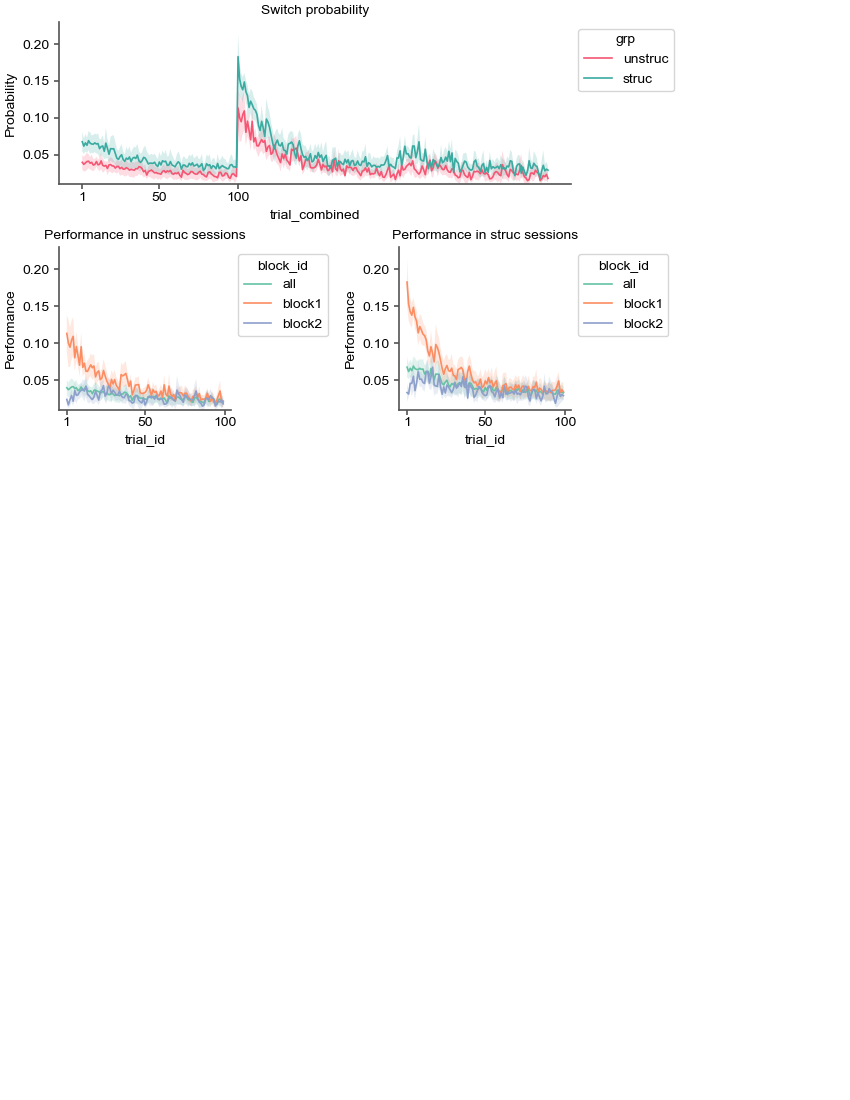

In [4]:
import seaborn as sns
import pandas as pd
from neuropy import plotting
import mab_subjects
import matplotlib.pyplot as plt
from mab_colors import Palette2Arm

df = mab_subjects.GroupData().switch_prob.latest

fig = plotting.Fig(6, 3, fontsize=10)

ax = fig.subplot(fig.gs[0, :2])

sns.lineplot(
    data=df,
    x="trial_combined",
    y="sp",
    hue="grp",
    palette=Palette2Arm().as_dict(),
    ax=ax,
    lw=1.2,
    err_kws=dict(edgecolor="none"),
    errorbar="se",
)
ax.set_title("Switch probability")
ax.set_ylabel("Probability")
ax.set_xticks([1, 50, 100])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0.01, 0.23)


for g, grp in enumerate(["unstruc", "struc"]):
    ax = fig.subplot(fig.gs[1, g])
    df_grp = df[df["grp"] == grp]

    sns.lineplot(
        data=df_grp,
        x="trial_id",
        y="sp",
        hue="block_id",
        palette="Set2",
        ax=ax,
        lw=1.2,
        err_kws=dict(edgecolor="none"),
        errorbar="se",
    )
    ax.set_title(f"Performance in {grp} sessions")
    ax.set_ylabel("Performance")
    ax.set_xticks([1, 50, 100])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_ylim(0.01, 0.23)